In [2]:
import geopandas as gpd
import altair as alt
import pandas as pd

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import DistanceMetric

In [3]:
# precint_footprint = gpd.read_file('..//data//Police Precincts.geojson')

trees = gpd.read_file('2015 Street Tree Census - Tree Data.geojson')

In [4]:
# Preprocess data
trees = trees.to_crs(epsg=4326) # Convert to longitude-latitude coordinate system

In [5]:

# Feature scaling
scaler = StandardScaler()
trees_scaled = scaler.fit_transform(trees[['longitude', 'latitude']])
# Apply clustering algorithm
db = DBSCAN(eps=0.0001, min_samples=2, metric='euclidean')
db.fit(trees_scaled)
labels = db.labels_

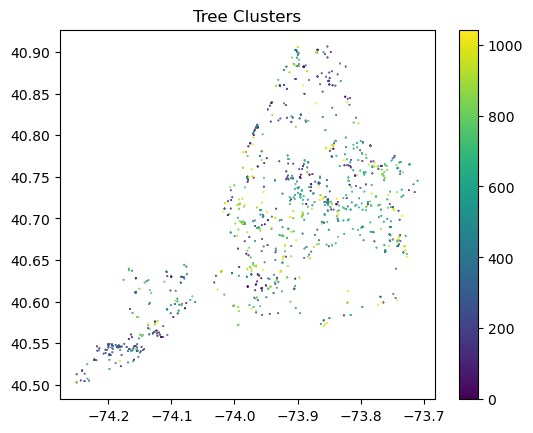

In [6]:
# Visualize the results
trees['labels'] = labels
# Remove trees with labels -1
trees_toplot = trees[trees['labels'] != -1]
trees_toplot.plot(column='labels', legend=True, markersize= 0.1)
plt.title('Tree Clusters')
plt.show()

In [43]:
trees_toplot['labels'].dtype

dtype('int64')

In [64]:
trees_toplot['longitude'] = trees_toplot['longitude'].astype(float)
trees_toplot['latitude'] = trees_toplot['latitude'].astype(float)

C:\Users\Kelvi\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [67]:
centroids = trees_toplot.groupby('labels')[['longitude', 'latitude']].mean()


In [68]:
centroids

,longitude,latitude
labels,,
0,-73.838298,40.717033
1,-73.963315,40.808812
2,-74.159501,40.530021
3,-73.825588,40.763787
4,-73.838255,40.717003
...,...,...
1038,-74.017567,40.708024
1039,-73.742266,40.601677
1040,-73.865658,40.738524


In [7]:
data = pd.read_csv("NYPD_Complaint_Data_Historic.csv")

C:\Users\Kelvi\AppData\Local\Temp\ipykernel_10092\1736923754.py:1: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NYPD_Complaint_Data_Historic.csv")


In [12]:
data

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,506547392,03/29/2018,20:30:00,NaN,NaN,32.0,03/30/2018,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,NaN,NaN,40.810877,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,NaN,25-44,WHITE,F
1,629632833,02/06/2018,23:15:00,NaN,NaN,52.0,02/07/2018,341,PETIT LARCENY,333.0,...,F,NaN,40.873671,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D
2,787203902,11/21/2018,00:15:00,11/21/2018,00:20:00,75.0,11/21/2018,341,PETIT LARCENY,321.0,...,F,NaN,40.651782,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,D
3,280364018,06/09/2018,21:42:00,06/09/2018,21:43:00,10.0,06/10/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.759310,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE HISPANIC,F
4,985800320,11/10/2018,19:40:00,11/10/2018,19:45:00,19.0,11/10/2018,341,PETIT LARCENY,333.0,...,F,NaN,40.764536,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825494,104527061,05/01/2008,18:55:00,05/01/2018,19:00:00,10.0,05/01/2018,235,DANGEROUS DRUGS,511.0,...,F,NaN,40.756788,-73.996540,"(40.756788048, -73.996539912)",PATROL BORO MAN SOUTH,NaN,UNKNOWN,UNKNOWN,E
7825495,284201488,05/18/2018,14:50:00,05/18/2018,14:55:00,122.0,05/22/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.577953,-74.102317,"(40.577953265, -74.102316756)",PATROL BORO STATEN ISLAND,NaN,<18,WHITE HISPANIC,M
7825496,808565901,11/19/2018,02:25:00,11/19/2018,02:30:00,110.0,11/19/2018,109,GRAND LARCENY,421.0,...,M,NaN,40.743188,-73.862427,"(40.743188053, -73.862427079)",PATROL BORO QUEENS NORTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,M
7825497,649441648,02/03/2018,10:02:00,02/03/2018,12:15:00,122.0,02/03/2018,578,HARRASSMENT 2,638.0,...,F,NaN,40.593665,-74.089000,"(40.593664627, -74.089000194)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M


In [11]:
data['Longitude'].dropna()

0         -73.941064
1         -73.908014
2         -73.885457
3         -73.994706
4         -73.970728
             ...    
7825494   -73.996540
7825495   -74.102317
7825496   -73.862427
7825497   -74.089000
7825498   -73.944529
Name: Longitude, Length: 7808160, dtype: float64

In [13]:
data['Latitude'].dropna()

0          40.810877
1          40.873671
2          40.651782
3          40.759310
4          40.764536
             ...    
7825494    40.756788
7825495    40.577953
7825496    40.743188
7825497    40.593665
7825498    40.688872
Name: Latitude, Length: 7808160, dtype: float64

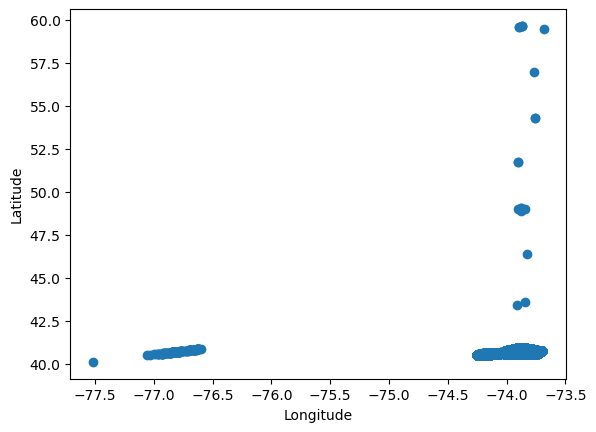

In [14]:
longitude = data['Longitude']
latitude = data['Latitude']

# Plot Longitude and Latitude on a scatter plot
plt.scatter(longitude, latitude)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [34]:
data = data.loc[(data['Longitude'] >= -74.5) & (data['Latitude'] <= 42.5)]

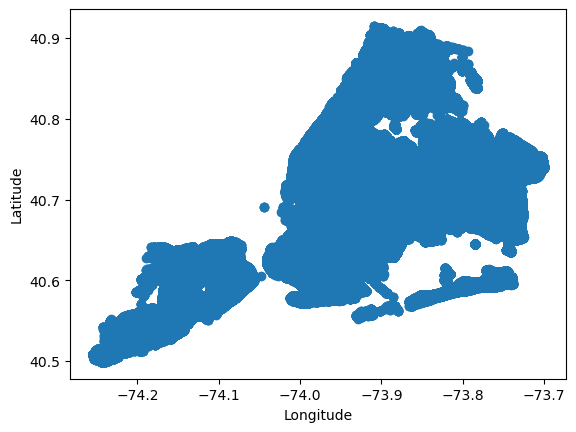

In [35]:
longitude = data['Longitude']
latitude = data['Latitude']

# Plot Longitude and Latitude on a scatter plot
plt.scatter(longitude, latitude)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [71]:
from sklearn.neighbors import KDTree
import numpy as np

def distance(loc1, loc2):
    loc1 = np.asarray(loc1)
    loc2 = np.asarray(loc2)
    return np.sqrt(np.sum((loc1 - loc2)**2))

# Create an array of centroid locations
centroids_array = centroids[['latitude', 'longitude']].values

# Build a kd-tree using the centroid locations
tree = KDTree(centroids_array)

# Iterate through rows of the data frame
for index, row in data.iterrows():
    crime_loc = [row['Latitude'], row['Longitude']]
    # Use the kd-tree to find the index of the nearest centroid
    _, nearest_centroid_index = tree.query([crime_loc], k=1)
    # Get the location of the nearest centroid
    nearest_centroid_loc = centroids_array[nearest_centroid_index][0]
    # Calculate the distance between the crime location and the nearest centroid
    dist = distance(crime_loc, nearest_centroid_loc)
    data.at[index, 'Distance'] = dist

In [73]:
import pickle

with open('distance.pickle', 'wb') as f:
    pickle.dump(data, f)



In [72]:
data

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Distance
0,506547392,03/29/2018,20:30:00,NaN,NaN,32.0,03/30/2018,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,NaN,40.810877,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,NaN,25-44,WHITE,F,0.005709
1,629632833,02/06/2018,23:15:00,NaN,NaN,52.0,02/07/2018,341,PETIT LARCENY,333.0,...,NaN,40.873671,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D,0.005102
2,787203902,11/21/2018,00:15:00,11/21/2018,00:20:00,75.0,11/21/2018,341,PETIT LARCENY,321.0,...,NaN,40.651782,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,D,0.002944
3,280364018,06/09/2018,21:42:00,06/09/2018,21:43:00,10.0,06/10/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,NaN,40.759310,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE HISPANIC,F,0.008323
4,985800320,11/10/2018,19:40:00,11/10/2018,19:45:00,19.0,11/10/2018,341,PETIT LARCENY,333.0,...,NaN,40.764536,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D,0.006010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825494,104527061,05/01/2008,18:55:00,05/01/2018,19:00:00,10.0,05/01/2018,235,DANGEROUS DRUGS,511.0,...,NaN,40.756788,-73.996540,"(40.756788048, -73.996539912)",PATROL BORO MAN SOUTH,NaN,UNKNOWN,UNKNOWN,E,0.010821
7825495,284201488,05/18/2018,14:50:00,05/18/2018,14:55:00,122.0,05/22/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,40.577953,-74.102317,"(40.577953265, -74.102316756)",PATROL BORO STATEN ISLAND,NaN,<18,WHITE HISPANIC,M,0.006323
7825496,808565901,11/19/2018,02:25:00,11/19/2018,02:30:00,110.0,11/19/2018,109,GRAND LARCENY,421.0,...,NaN,40.743188,-73.862427,"(40.743188053, -73.862427079)",PATROL BORO QUEENS NORTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,M,0.002965
7825497,649441648,02/03/2018,10:02:00,02/03/2018,12:15:00,122.0,02/03/2018,578,HARRASSMENT 2,638.0,...,NaN,40.593665,-74.089000,"(40.593664627, -74.089000194)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M,0.003067


In [74]:
data.sort_values(by=['Distance'])

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Distance
945782,271935977,09/07/2019,17:30:00,09/14/2019,09:30:00,17.0,09/14/2019,341,PETIT LARCENY,352.0,...,NaN,40.749919,-73.979281,"(40.749918880000045, -73.97928128899997)",PATROL BORO MAN SOUTH,NaN,45-64,WHITE,M,0.000023
2387905,542516362,05/14/2020,11:00:00,05/14/2020,23:00:00,17.0,05/15/2020,109,GRAND LARCENY,409.0,...,NaN,40.749919,-73.979281,"(40.749918880000045, -73.97928128899997)",PATROL BORO MAN SOUTH,NaN,25-44,WHITE,M,0.000023
890190,883412803,08/27/2019,11:40:00,08/28/2019,10:30:00,17.0,08/29/2019,341,PETIT LARCENY,303.0,...,NaN,40.749919,-73.979281,"(40.749918880000045, -73.97928128899997)",PATROL BORO MAN SOUTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,F,0.000023
784706,113946237,11/21/2019,21:00:00,11/22/2019,03:00:00,17.0,11/22/2019,340,FRAUDS,718.0,...,NaN,40.749919,-73.979281,"(40.749918880000045, -73.97928128899997)",PATROL BORO MAN SOUTH,NaN,25-44,WHITE,F,0.000023
2197278,986407651,11/09/2020,08:20:00,11/09/2020,08:30:00,17.0,11/09/2020,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,40.749919,-73.979281,"(40.749918880000045, -73.97928128899997)",PATROL BORO MAN SOUTH,NaN,UNKNOWN,UNKNOWN,D,0.000023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4692235,729580345,10/09/2007,15:15:00,NaN,NaN,122.0,10/09/2007,578,HARRASSMENT 2,638.0,...,NaN,40.585900,-74.201578,"(40.585899954, -74.201578307)",PATROL BORO STATEN ISLAND,NaN,25-44,WHITE HISPANIC,M,0.036309
6708209,623919272,06/07/2007,10:30:00,06/08/2007,01:30:00,122.0,06/08/2007,109,GRAND LARCENY,419.0,...,NaN,40.585900,-74.201578,"(40.585899954, -74.201578307)",PATROL BORO STATEN ISLAND,NaN,18-24,UNKNOWN,M,0.036309
5888586,566317793,07/22/2008,17:10:00,NaN,NaN,122.0,07/25/2008,578,HARRASSMENT 2,638.0,...,NaN,40.585900,-74.201578,"(40.585899954, -74.201578307)",PATROL BORO STATEN ISLAND,NaN,25-44,BLACK,F,0.036309
6577860,361648345,03/09/2010,22:00:00,03/09/2010,23:00:00,122.0,03/10/2010,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,NaN,40.585900,-74.201578,"(40.585899954, -74.201578307)",PATROL BORO STATEN ISLAND,NaN,25-44,WHITE HISPANIC,F,0.036309


In [75]:
data

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Distance
0,506547392,03/29/2018,20:30:00,NaN,NaN,32.0,03/30/2018,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,NaN,40.810877,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,NaN,25-44,WHITE,F,0.005709
1,629632833,02/06/2018,23:15:00,NaN,NaN,52.0,02/07/2018,341,PETIT LARCENY,333.0,...,NaN,40.873671,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D,0.005102
2,787203902,11/21/2018,00:15:00,11/21/2018,00:20:00,75.0,11/21/2018,341,PETIT LARCENY,321.0,...,NaN,40.651782,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,D,0.002944
3,280364018,06/09/2018,21:42:00,06/09/2018,21:43:00,10.0,06/10/2018,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,NaN,40.759310,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE HISPANIC,F,0.008323
4,985800320,11/10/2018,19:40:00,11/10/2018,19:45:00,19.0,11/10/2018,341,PETIT LARCENY,333.0,...,NaN,40.764536,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D,0.006010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825494,104527061,05/01/2008,18:55:00,05/01/2018,19:00:00,10.0,05/01/2018,235,DANGEROUS DRUGS,511.0,...,NaN,40.756788,-73.996540,"(40.756788048, -73.996539912)",PATROL BORO MAN SOUTH,NaN,UNKNOWN,UNKNOWN,E,0.010821
7825495,284201488,05/18/2018,14:50:00,05/18/2018,14:55:00,122.0,05/22/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,40.577953,-74.102317,"(40.577953265, -74.102316756)",PATROL BORO STATEN ISLAND,NaN,<18,WHITE HISPANIC,M,0.006323
7825496,808565901,11/19/2018,02:25:00,11/19/2018,02:30:00,110.0,11/19/2018,109,GRAND LARCENY,421.0,...,NaN,40.743188,-73.862427,"(40.743188053, -73.862427079)",PATROL BORO QUEENS NORTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,M,0.002965
7825497,649441648,02/03/2018,10:02:00,02/03/2018,12:15:00,122.0,02/03/2018,578,HARRASSMENT 2,638.0,...,NaN,40.593665,-74.089000,"(40.593664627, -74.089000194)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE,M,0.003067
